<a href="https://colab.research.google.com/github/ardramohan23/Pothole_Detection/blob/main/Pothole_Yolo_v11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Pothole Detection using YOLO V11**

**Introduction**
Potholes are a common problem on roadways worldwide, often resulting from the wear and tear caused by vehicles, weather conditions, and environmental factors. They are hazardous to drivers, causing accidents, vehicle damage, and expensive repairs. Traditional methods of pothole detection, such as manual inspections, are time-consuming, expensive, and not scalable. Therefore, automating the pothole detection process using computer vision and deep learning techniques is an efficient and effective approach.

**Problem Statement**
The key challenges addressed in this project are:

Accurate detection of potholes: Identifying potholes in images or videos can be difficult due to varying lighting conditions, road surfaces, and environmental factors.
Real-time processing: The solution must be fast enough for real-time deployment in surveillance systems or vehicles.
Scalability: The system should work across different types of road surfaces, road conditions, and geographical locations.

**Objectives**
To develop a model capable of detecting potholes from images or videos taken from road cameras or vehicles.

**Data Collection:** Public datasets from kaggle contain labeled images of road damages, including potholes. These datasets can be used to train the model.

**Model Selection**: YOLO is a state-of-the-art, fast, and accurate object detection algorithm that works well for real-time applications. YOLOv11 offers pre-trained models on COCO and custom datasets, making it easier to fine-tune for specific tasks like pothole detection.



Installing Ultralytics

In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 881.2/881.2 kB 8.9 MB/s eta 0:00:00


Mounting drive to access dataset and to save the results

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Importing necessary libraries

In [ ]:
import os
import matplotlib.pyplot as plt
from skimage.io import imread

Evaluating number of images available for training,validating and testing

In [ ]:
train=len(os.listdir('/content/drive/MyDrive/Pothole_Dataset/train/images'))
valid=len(os.listdir('/content/drive/MyDrive/Pothole_Dataset/valid/images'))
test=len(os.listdir('/content/drive/MyDrive/Pothole_Dataset/test/images'))
print('Number of images in train data =',train)
print('Number of images in valid data =',valid)
print('Number of images in test data =',test)

Number of images in train data = 1446
Number of images in valid data = 310
Number of images in test data = 311


Plotting one of the training image

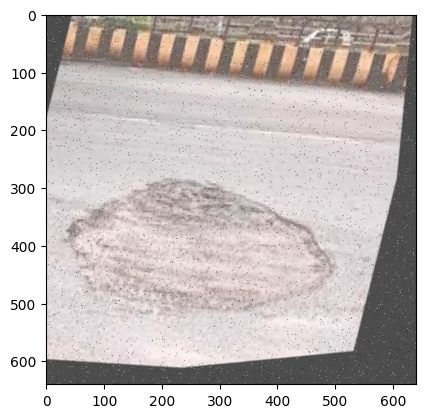

In [ ]:
img=imread('/content/drive/MyDrive/Pothole_Dataset/train/images/111_jpg.rf.a7e062c0e99b483b56de4c425950eff1.jpg')
plt.imshow(img)

Training the model using train dataset

In [ ]:
!yolo task=detect mode=train model=yolo11n.pt data=/content/drive/MyDrive/Pothole_Dataset/potholes.yaml batch=8 epochs=10 project=/content/drive/MyDrive/Pothole_Dataset/training_results name=pothole


Ultralytics 8.3.28 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/content/drive/MyDrive/Pothole_Dataset/potholes.yaml, epochs=10, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=/content/drive/MyDrive/Pothole_Dataset/training_results, name=pothole2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False,

Testing the model with the test dataset

In [11]:
!yolo task=detect  mode=predict  model=/content/drive/MyDrive/Pothole_Dataset/training_results/pothole2/weights/best.pt   conf=0.55  source=/content/drive/MyDrive/Pothole_Dataset/test/images


Ultralytics 8.3.28 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs

image 1/311 /content/drive/MyDrive/Pothole_Dataset/test/images/102_jpg.rf.46827740827c370519d5cdf587b390ae.jpg: 640x640 1 pothole, 8.8ms
image 2/311 /content/drive/MyDrive/Pothole_Dataset/test/images/102_jpg.rf.f2944cec5a17c9d9d17cade72d1cbc25.jpg: 640x640 (no detections), 17.6ms
image 3/311 /content/drive/MyDrive/Pothole_Dataset/test/images/104_jpg.rf.c4ba8071dab9281ed48fd741be0faefa.jpg: 640x640 (no detections), 15.1ms
image 4/311 /content/drive/MyDrive/Pothole_Dataset/test/images/109_jpg.rf.878ffc6fc05933326992a18acb6b23ab.jpg: 640x640 (no detections), 12.1ms
image 5/311 /content/drive/MyDrive/Pothole_Dataset/test/images/109_jpg.rf.a76b2933890d1d0b936e5aa6efc094aa.jpg: 640x640 1 pothole, 12.6ms
image 6/311 /content/drive/MyDrive/Pothole_Dataset/test/images/115_jpg.rf.939a42be576ce3865ca5428bdecfefd0.jpg: 640x640 1 potho

Saving the output images in drive

In [12]:
!cp -r /content/runs/detect/predict /content/drive/MyDrive/Pothole_Dataset/output/image_results

Testing the model with a video

In [13]:
!yolo task=detect  mode=predict  model=/content/drive/MyDrive/Pothole_Dataset/training_results/pothole2/weights/best.pt   conf=0.55  source=/content/drive/MyDrive/Pothole_Dataset/test_video


Ultralytics 8.3.28 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs

video 1/1 (frame 1/692) /content/drive/MyDrive/Pothole_Dataset/test_video/video1.mp4: 384x640 1 pothole, 45.8ms
video 1/1 (frame 2/692) /content/drive/MyDrive/Pothole_Dataset/test_video/video1.mp4: 384x640 1 pothole, 9.3ms
video 1/1 (frame 3/692) /content/drive/MyDrive/Pothole_Dataset/test_video/video1.mp4: 384x640 1 pothole, 10.4ms
video 1/1 (frame 4/692) /content/drive/MyDrive/Pothole_Dataset/test_video/video1.mp4: 384x640 1 pothole, 8.9ms
video 1/1 (frame 5/692) /content/drive/MyDrive/Pothole_Dataset/test_video/video1.mp4: 384x640 1 pothole, 9.4ms
video 1/1 (frame 6/692) /content/drive/MyDrive/Pothole_Dataset/test_video/video1.mp4: 384x640 1 pothole, 10.3ms
video 1/1 (frame 7/692) /content/drive/MyDrive/Pothole_Dataset/test_video/video1.mp4: 384x640 1 pothole, 9.4ms
video 1/1 (frame 8/692) /content/drive/MyDrive/Pothole

Saving output into drive

In [14]:
!cp -r /content/runs/detect/predict2 /content/drive/MyDrive/Pothole_Dataset/output/video_results

Random image testing and saving in drive location

In [25]:
!yolo task=detect  mode=predict  model=/content/drive/MyDrive/Pothole_Dataset/training_results/pothole2/weights/best.pt   conf=0.55  source=/content/drive/MyDrive/Pothole_Dataset/test_images

Ultralytics 8.3.28 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs

image 1/14 /content/drive/MyDrive/Pothole_Dataset/test_images/potholes100.png: 480x640 1 pothole, 42.5ms
image 2/14 /content/drive/MyDrive/Pothole_Dataset/test_images/potholes102.png: 480x640 1 pothole, 11.9ms
image 3/14 /content/drive/MyDrive/Pothole_Dataset/test_images/potholes103.png: 416x640 1 pothole, 74.3ms
image 4/14 /content/drive/MyDrive/Pothole_Dataset/test_images/potholes104.png: 416x640 (no detections), 8.7ms
image 5/14 /content/drive/MyDrive/Pothole_Dataset/test_images/potholes146.png: 448x640 1 pothole, 43.3ms
image 6/14 /content/drive/MyDrive/Pothole_Dataset/test_images/potholes156.png: 384x640 (no detections), 42.0ms
image 7/14 /content/drive/MyDrive/Pothole_Dataset/test_images/potholes170.png: 448x640 1 pothole, 9.4ms
image 8/14 /content/drive/MyDrive/Pothole_Dataset/test_images/potholes41.png: 416x640 (no

In [26]:
!cp -r /content/runs/detect/predict6 /content/drive/MyDrive/Pothole_Dataset/output

Evaluating the performance of model

In [28]:
from ultralytics import YOLO

model = YOLO('/content/drive/MyDrive/Pothole_Dataset/training_results/pothole2/weights/best.pt')
results = model.val(data='/content/drive/MyDrive/Pothole_Dataset/potholes.yaml')
print(results)

Ultralytics 8.3.28 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


val: Scanning /content/drive/MyDrive/Pothole_Images/valid/labels.cache... 310 images, 0 backgrounds, 0 corrupt: 100%|██████████| 310/310 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:06<00:00,  3.15it/s]


                   all        310        626      0.755      0.561      0.668      0.355
Speed: 1.4ms preprocess, 5.2ms inference, 0.0ms loss, 4.1ms postprocess per image
Results saved to runs/detect/val
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7df867f6f280>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033

**Results and Evaluation**


1. Precision (Box(P)) = 0.755
Precision measures the percentage of predicted potholes that are correct.
75.5% of the predicted potholes were correct. This means that the model is fairly accurate in its detections but still produces false positives (where it predicts potholes that aren't actually there).
2. Recall (Box(R)) = 0.561
Recall measures the percentage of actual potholes that were detected by the model.
A recall of 56.1% means that the model detected 56.1% of all the actual potholes present in the images. This indicates that the model is missing a significant number of potholes (false negatives), which can be improved by fine-tuning or adding more diverse data.
3. mAP50 = 0.668
mAP50 is the mean average precision at IoU=0.5 (the standard metric for object detection).
A mAP50 of 66.8% is a solid result, indicating that the model performs fairly well in detecting potholes, with a good trade-off between precision and recall.
4. mAP50-95 = 0.355
mAP50-95 evaluates the model at multiple IoU thresholds (from 0.5 to 0.95). This is a more stringent measure of detection accuracy, and a lower mAP50-95 suggests that the model is less confident in locating potholes at higher IoU thresholds.
A mAP50-95 of 35.5% means that while the model can detect potholes at an IoU of 0.5, it struggles with more precise detections (IoU > 0.5). This is common, especially with small objects like potholes, where precise localization can be challenging.

**Potential Applications**

The potential applications of a pothole detection system are vast:

**Road Maintenance**: Authorities can use the system to detect potholes and prioritize repairs based on severity.

**Vehicle Safety**: Integrated into vehicle systems for real-time alerts to drivers about potholes.

**Smart Cities**: Used as part of an intelligent transportation system (ITS) for automated road condition monitoring.

**Insurance**: Used by insurance companies to assess the damage caused by potholes to vehicles.